In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [3]:
root_folder = "/home/snagendra/go/src/github.com/zeu5/raft-rl-test/"

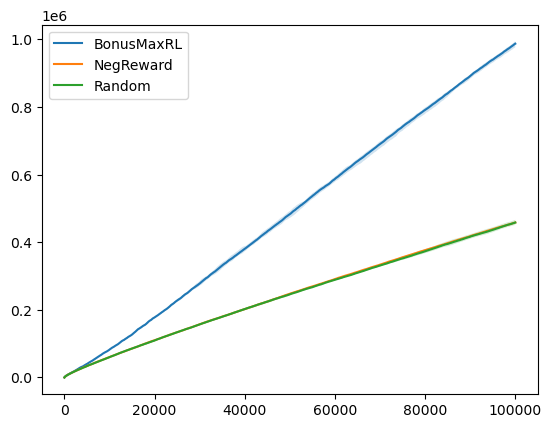

In [8]:
paxos_expl = {
}

paxos_algos = ["BonusMaxRL", "NegReward", "Random"]
runs = range(3)
paxos_result_folder = os.path.join(root_folder, "result_paxos_100k")

for r in runs:
    for a in paxos_algos:
        file = "run_{}_{}-Part.json".format(r, a)
        with open(os.path.join(paxos_result_folder, file)) as data_file:
            data = json.load(data_file)
            if a not in paxos_expl:
                paxos_expl[a] = []    
            paxos_expl[a].append(data["UniqueStates"])

fig, ax = plt.subplots()

for a, data in paxos_expl.items():
    ndata = np.array(data)
    x = np.arange(np.size(data[0]))
    ax.fill_between(x, ndata.min(axis=0), ndata.max(axis=0), alpha=0.2)
    ax.plot(x, ndata.mean(axis=0), label=a)

ax.legend()
plt.show()
    

For BonusMax final coverage average: 6995.6
For NegReward final coverage average: 1995.4
For Random final coverage average: 1028.8


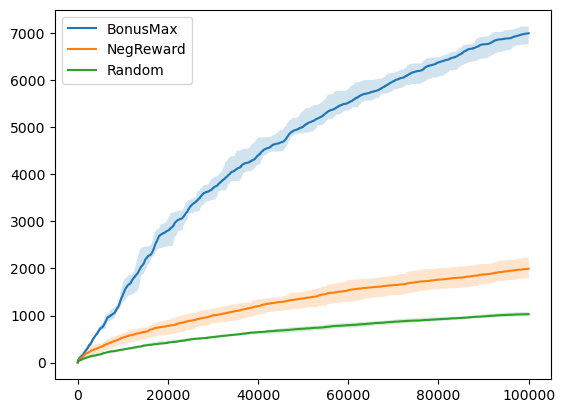

In [6]:
rsl_expl = {
}

paxos_algos = ["BonusMax", "NegReward", "Random"]
runs = range(5)
paxos_result_folder = os.path.join(root_folder, "result_rsl")

for r in runs:
    file = "{}_data.json".format(r)
    with open(os.path.join(paxos_result_folder, file)) as data_file:
        data = json.load(data_file)
        for a in paxos_algos:
            if a not in rsl_expl:
                rsl_expl[a] = []
            rsl_expl[a].append(data[a])

fig, ax = plt.subplots()

for a, data in rsl_expl.items():
    ndata = np.array(data)
    x = np.arange(np.size(data[0]))
    ax.fill_between(x, ndata.min(axis=0), ndata.max(axis=0), alpha=0.2)
    ax.plot(x, ndata.mean(axis=0), label=a)
    print("For {} final coverage average: {}".format(a, ndata.mean(axis=0)[-1]))

ax.legend()
plt.savefig("rsl-expl.png")

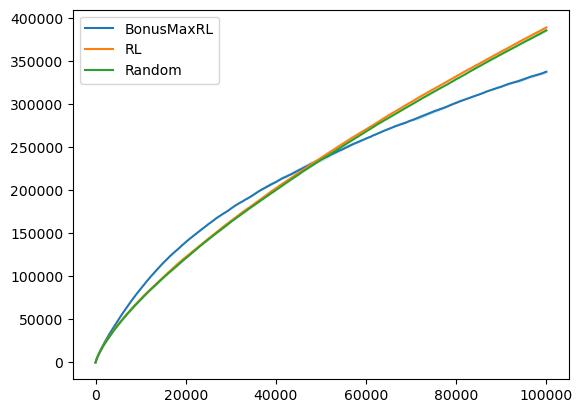

In [11]:
raft_expl = {
}

paxos_algos = ["BonusMaxRL", "RL", "Random"]
runs = range(3)
paxos_result_folder = os.path.join(root_folder, "result_raft")

for r in runs:
    for a in paxos_algos:
        file = "{}_{}.json".format(r, a)
        with open(os.path.join(paxos_result_folder, file)) as data_file:
            data = json.load(data_file)
            if a not in raft_expl:
                raft_expl[a] = []    
            raft_expl[a].append(data["UniqueStates"])

fig, ax = plt.subplots()

for a, data in raft_expl.items():
    ndata = np.array(data)
    x = np.arange(np.size(data[0]))
    ax.fill_between(x, ndata.min(axis=0), ndata.max(axis=0), alpha=0.2)
    ax.plot(x, ndata.mean(axis=0), label=a)

ax.legend()
plt.show()

In [5]:
rsl_reward_machines = ["InStatePrimary", "SinglePrimary", "NumDecided", "NodeDecidedAndPrimary", "ChangePrimary", "NodeDecidedAndPrimary", "NodeDecidedAfterPrimary", "InBallot", "NodeInBallot", "InPreparedBallot", "NodeInPreparedBallot"]

for rm in rsl_reward_machines:
    result_path = os.path.join(root_folder, "result_rsl_{}".format(rm))
    runs = []
    for r in os.listdir(result_path):
        with open(os.path.join(result_path, r)) as run_f:
            runs.append(json.load(run_f))
        
    data = {}
    for r in runs:
        for algo, d in r.items():
            if algo not in data:
                data[algo] = {
                    "finalPredicateTraces": [],
                    "finalPredicateStates": []
                }
            data[algo]["finalPredicateTraces"].append(d["rmStateVisits"]["Final"])
            data[algo]["finalPredicateStates"].append(d["finalPredicateStates"])
    
    print("For reward machine: {}".format(rm))
    for algo, d in data.items():
        print("\tFor algo: {}".format(algo))
        print("\t\tMean traces: {}, std traces: {}".format(np.mean(d["finalPredicateTraces"]), np.std(d["finalPredicateTraces"])))
        print("\t\tMean states: {}, std states: {}".format(np.mean(d["finalPredicateStates"]), np.std(d["finalPredicateStates"])))

For reward machine: InStatePrimary
	For algo: BonusMax
		Mean traces: 728.0, std traces: 84.0
		Mean states: 2665.5, std states: 223.5
	For algo: RewardMachine
		Mean traces: 5665.0, std traces: 475.0
		Mean states: 9912.5, std states: 28.5
	For algo: Strict
		Mean traces: 9762.5, std traces: 2.5
		Mean states: 4595.0, std states: 14.0
	For algo: random
		Mean traces: 160.5, std traces: 4.5
		Mean states: 668.0, std states: 37.0
For reward machine: SinglePrimary
	For algo: BonusMax
		Mean traces: 379.5, std traces: 17.5
		Mean states: 1776.5, std states: 111.5
	For algo: RewardMachine
		Mean traces: 1200.5, std traces: 41.5
		Mean states: 4041.0, std states: 300.0
	For algo: Strict
		Mean traces: 4378.5, std traces: 19.5
		Mean states: 2774.5, std states: 126.5
	For algo: random
		Mean traces: 58.0, std traces: 4.0
		Mean states: 398.0, std states: 16.0
For reward machine: NumDecided
	For algo: BonusMax
		Mean traces: 165.33333333333334, std traces: 37.18721405118819
		Mean states: 762